# An Introduction to Parcellations

*Written By: Clara Sava-Segal & Thomas L. Botch (edited by Luke Chang)*

What spatial scale should we use to analyze neuroimaging data? Traditional univariate approaches have focused on analyzing data at the voxel level or averaging activity within a region of interest (ROI). The goal of this tutorial is to provide an introduction to parcellation schemes. We will cover the types of atlases that are available, when to use them, and how to work with them in python. 

## Neuroimaging and Spatial Scaling: Why consider parcellations <a class="anchor" id="chapter1"></a>
There is vast diversity in the spatial scales at which different psychological and neurological processes are organized. To study these different mechanisms most effectively, the scale of our methods should be consistent with the scale of this organization (for more detail see: [Jolly & Chang, 2021](https://academic.oup.com/scan/article/16/8/795/6121195?login=true)).

Parcellations provide a way to examine the brain at different spatial scales by restricting the number of regions of interest to variable scales as determined by anatomical or functional divisions. We provide extensive detail on anatomical, functional and structural approaches to building parcellations. In general, the goal is to use group together voxels based on either one of these methodological divisions. This grouping of voxels can be either contiguous (voxels that are spatially next to one another in a particular region of the brain) or non-contiguous (voxels that are spatially disjoint, but functionally connected (e.g., resting state networks). 

The table below is a useful discussion comparing ROI (parcellation) approaches to searchlights and whole brain approaches. (From: [Jolly & Chang, 2021](https://academic.oup.com/scan/article/16/8/795/6121195?login=true)). The goal of this notebook is to provide extensive detail on how the publicly available parcellations have been generated to give you more insight as to which ones would be better suited for your own research questions. 

![](../images/parcellations/spatial_feature_selection_table.png)


In [1]:
#@title Run this cell to run hidden code that will be useful below
#! pip install nilearn
#! pip install nltools

#! pip install hcp_utils
#!pip install --upgrade hcp_utils

from nilearn import datasets
from nilearn import plotting
import warnings
warnings.filterwarnings("ignore")
! pip install hcp_utils
import hcp_utils
!pip install --upgrade hcp_utils
import numpy as np
from nltools.data import Brain_Data



ModuleNotFoundError: No module named 'nilearn'

## A quick note on labeling: 

- The terms parcellation, atlas, and template are often used interchangeably, as noted in [Moghimi *et al* 2021](https://arxiv.org/pdf/2107.03475.pdf). We use their labeling strategy below to describe the three strategies that have been used to generate parcellations: 
- **Parcellation**: a division of the gray matter that enumerates what region each gray matter voxel is a part of 
- **Atlas**: could be used to refer to anatomical parcellations
- **Template**: the use of a T1-weighted MRI image as the reference for other T1-weighted images

## Working with Parcellations/Atlases:
There are two main repositories of anatomical and functional atlases that can programmatically accessed via python packages (e.g., Nilearn and Neuroparc). We briefly detail these below and then will provide code-snippets and plotting suggestions for using these packages as we introduce parcellations below. 

### Nilearn:
[Nilearn](https://nilearn.github.io/stable/index.html) (Abraham *et al*, 2014) is a python package that combines tools for neuroimaging and provides command line functions to fetch atlases that make using parcellations easy. Nilearn includes **12** anatomically and functionally defined atlases, including Harvard-Oxford, Schaefer, Yeo and Anatomated Anatomical Labeling (AAL). 

Here is how each of the atlases can be downloaded using python.

In [1]:
from nilearn import datasets

datasets.fetch_atlas_harvard_oxford
datasets.fetch_atlas_difumo
datasets.fetch_atlas_msdl
datasets.fetch_atlas_schaefer_2018
datasets.fetch_atlas_aal
datasets.fetch_atlas_smith_2009
datasets.fetch_atlas_surf_destrieux
datasets.fetch_atlas_craddock_2012
datasets.fetch_atlas_talairach
datasets.fetch_atlas_yeo_2011
datasets.fetch_atlas_juelich
datasets.fetch_atlas_basc_multiscale_2015

<function nilearn.datasets.atlas.fetch_atlas_basc_multiscale_2015(version='sym', data_dir=None, url=None, resume=True, verbose=1)>

### Neuroparc

Alternatively, there is also the [Neuroparc](https://github.com/neurodata/neuroparc) package, which provides a large repository of standardized atlases (currently **46**; see Table below), which can be used interchangeably. Neuroparc includes details to make **the comparison between atlases** in MNI space easily [(Lawrence *et al.*, 2021)](https://www.nature.com/articles/s41597-021-00849-3). Importantly, their Github page [README file](https://github.com/neurodata/neuroparc/blob/master/README.md#atlas-info-summary) provides an excellent summary of how the parcellations where created, their description, and their native space.

The table below [(Lawrence *et al.*, 2021)](https://www.nature.com/articles/s41597-021-00849-3) includes a list of the parcellations available, the number of ROIs in each depending on the resolution, and whether a anatomical labels are available. Again, if you want further information on these parcellations, we recommend checking out the aforementioned [README file](https://github.com/neurodata/neuroparc/blob/master/README.md#atlas-info-summary). 

![](../images/parcellations/neuroparc_atlas_table.png)


![](../images/parcellations/brainAtlases_color_wRegions.png)

## Different types of parcellations and how to access publicly available parcellations: 
### Anatomical vs Functional
#### Anatomical Atlases

With the advent of MRI, atlases have started to rely on neural macrostructures such as sulci or gyri to distinguish regions, with the expectation that this would result in brain regions with voxels that have a shared cytoarchitecture. **The labels in these atlases reflect the spatial location of an anatomical region.** 

There are different approaches (Direct vs. Mirroring) to set up and generate an anatomical atlas that are well described in [Moghimi *et al.* 2021](https://arxiv.org/pdf/2107.03475.pdf) if you are interested in reading more. The mirroring approach has become standard practice in most modern fMRI research programs. It entails registering an image that needs to be parcellated to an existent template image that has already been labeled. Each voxel gets the corresponding voxel's label in the reference image. 

Commonly used and referenced template/reference images include the [Talairach template](http://www.talairach.org/about.html) (Talairach and Tournoux, 1988) and the [MNI 152 template](https://github.com/Jfortin1/MNITemplate). 

Two single-subject attempts to automate these procedures were the AAL atlas and the Talairach atlas (described below). "Single-subject" here means that **one individual's** brain was used as the reference point. Unsurprisingly, this means that the anatomical idiosyncrasies of these individuals are reflected in these template images, but these are still commonly used as you will see below. 

1. [AAL-Automatic Anatomical Labeling](https://pubmed.ncbi.nlm.nih.gov/11771995/) [Tzourio-Mazoyer *et al*, 2002]

- This **anatomical** atlas provides anatomical landmarks following the sulci in the brain. 
- This is available in both Neuroparc and in Nilearn for easy access (see code below)
- 116 regions
- Generated from 1 subject

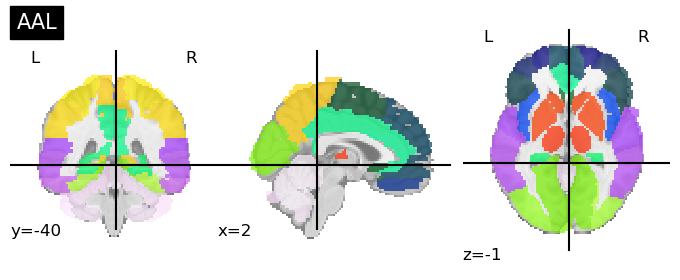

In [24]:
from nilearn import datasets, plotting

aal = datasets.fetch_atlas_aal(version='SPM12')
aal.maps

plotting.plot_roi(aal.maps, title="AAL")


2. [Talairach Atlas](http://www.talairach.org/) (Talairach and Tournoux, 1988) 
- This **anatomical** atlas includes the Hemisphere, Lobe, Gyrus, Tissue Type, and Cell Type.
- This is available in both Neuroparc and in Nilearn for easy access (see below). As you can see in the code snippet below, to specify the level at which you want this anatomical atlas, you can feed that as input into the code.
"level_name" should be one of ['hemisphere', 'lobe', 'gyrus', 'tissue', 'ba']
- 110 regions
- Generated from 1 alcoholic subject post-mortem at age 60

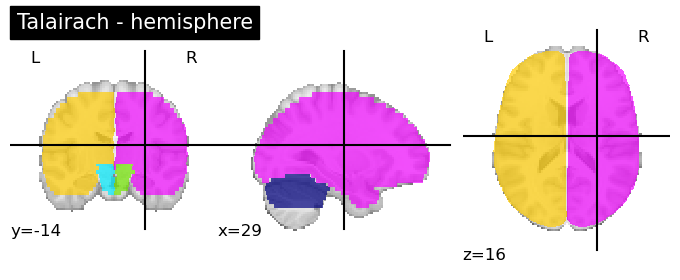

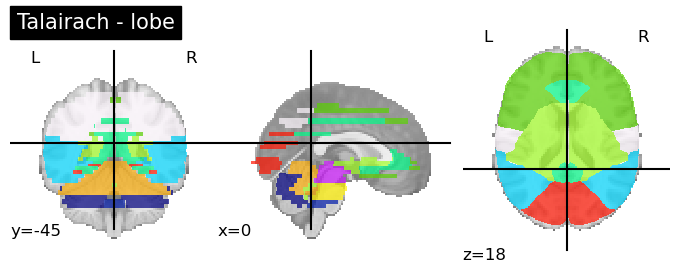

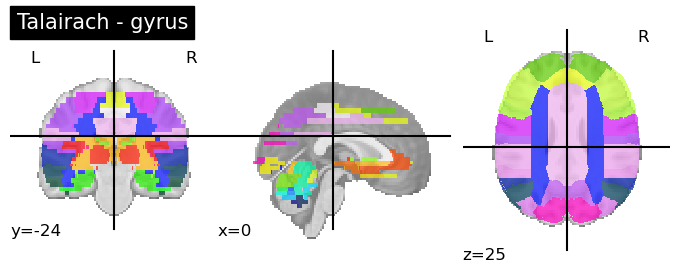

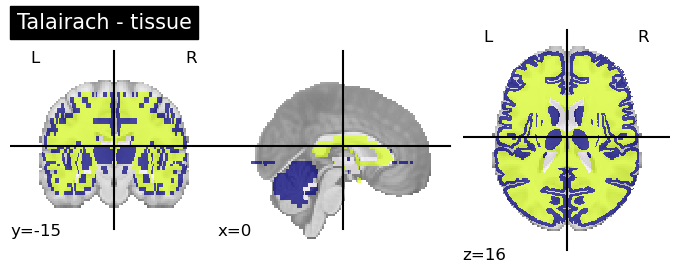

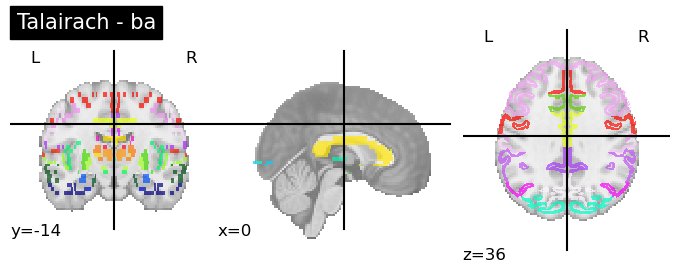

In [26]:
for level in ['hemisphere', 'lobe', 'gyrus', 'tissue', 'ba']:
  talairach = datasets.fetch_atlas_talairach(level_name=level)

  plotting.plot_roi(talairach.maps, title=f'Talairach - {level}')

**Multiple-subject atlases**.
These atlases use the combination of multiple subjects' T1 scans as the reference image for mirroring in generating anatomical atlases. Multiple-subject parcelations are thought to be more accurate than single subject parcellations and said to be "probabilistic."

**Probabilistic** refers to the ability to detect the probability of a voxel belonging in a region of the brain given that that voxel has been assigned using multiple subjects as compare to one. 

There are numerous ways to assign a subject's data that you want to be parcellated to a probabilistic atlas. One method is to **generate a single reference atlas** in which there is one image registration between the reference image and the to-be-parcellated image. Evidently, this is prone to errors of image registration. In this method, the probability that each voxel in your data belongs to a region in the reference atlas is calculated while also taking into account the surface geometry and image intensity, as reviewed in Moghimi *et al.* 2021 and posited in Fischl *et al.* 2002/2004. Importantly, this method has been implemented into [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) and the [Human Connectome Project](http://www.humanconnectomeproject.org/) imaging pipeline. The alternative is a **multiple-reference atlases** approach in which each atlas is assigned to the new brain image separately such that the voxel is assigned to its corresponding image based on its assignment across multiple reference atlases. 

To further emphasize, a major obstacle when it comes to anatomical atlases is the degree of idiosyncracy in neuroanatomy as well as the subjective nature of human manual atlases. Importantly, automated algorithms have been generated to bypass the latter and guidelines have been put forth to aid in keeping manual atlases consistent. Likewise, reference atlases exist based on *age* to deal with changes in neural morphology. We do not include those here.

Numerous multi-subject atlases have been generated and made publicly available. We describe three of the most commonly used ones below: 

1. [Harvard-Oxford ](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases)

- These are a series of **probabilistic** atlases that cover 48 cortical and 21 subcortical structures using T1-weighted images from 21 male and 16 females that were all healthy. Importantly, these have all been registered into **MNI-152** space making their usage quite simple. 
- These are available in both Nilearn and Neuroparc (see code below). 
- The nilearn function [`fetch_atlas-<name>`](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_harvard_oxford.html) requires that you load in the 'name of the atlas' that you wish to load as 'atlas-name'.
- There are numerous Harvard-Oxford atlases available that can be called through this function. For ease of viewing and deciding which one you are interested in, we recommend looking here: https://neurovault.org/collections/262/. We provide code to load in two sample atlases below - one cortical and one subcortical: 

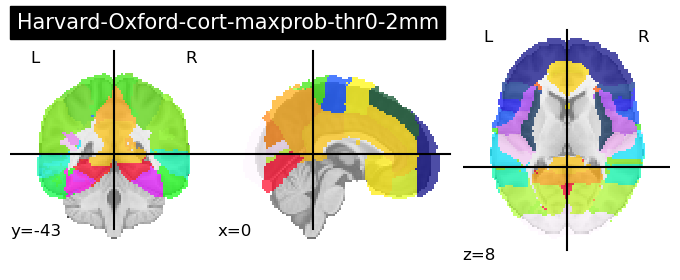

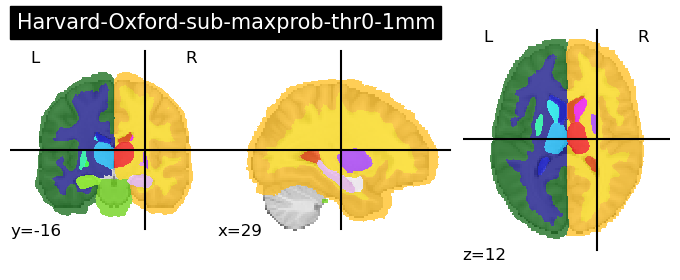

In [27]:
for atlas_name in ['cort-maxprob-thr0-2mm', 'sub-maxprob-thr0-1mm']:

  harvard_oxford = datasets.fetch_atlas_harvard_oxford(atlas_name )

  plotting.plot_roi(harvard_oxford.maps, title=f'Harvard-Oxford-{atlas_name}')

2. Desikan-Killiany (Desikan, 2006)
- This is a multi-subject, single reference atlas that is part of the [Freesurfer software package](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation). 
- It was generated using 30 healthy subjects and 10 subjects with Alzheimer's (ranging from 19-87 years old) making it apt for use with people of different ages and different degrees of neural atrophy. Due to this, it has also been used beyond fMRI research to localize and visualize electrodes implanted into patients with medically-refractory epilepsy for intracranial recordings (iELVis package [link text](https://www.sciencedirect.com/science/article/pii/S0165027017300365)). 
- Defined by gyri
- Regions: 68, only cortical
- Unfortunately, this atlas is not currently available in nilearn, but is a part of Neuroparc in MNI 152 space which we load in below. Notably, there are different options in Neuroparc based on the resolution you are interested in. We load in 1x1x1.
- Notably, there is also the updated Desikan-Killiany-Tourville (DKT) atlas where regions that were not clearly defined were merged into other regions (total: 62, still only cortical)




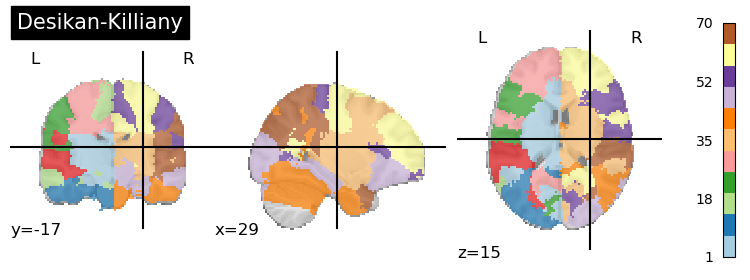

In [36]:
from nltools import Brain_Data

desikan_killiany = Brain_Data('https://github.com/neurodata/neuroparc/raw/master/atlases/label/Human/Desikan_space-MNI152NLin6_res-1x1x1.nii.gz').to_nifti()

plotting.plot_roi(desikan_killiany, title='Desikan-Killiany',cmap='Paired', colorbar=True)



3. Destrieux Atlas [(Destrieux *et al.* 2010)](https://www.sciencedirect.com/science/article/pii/S1053811910008542)

- Defined by gyri and sulci
- One of the first anatomical atlases to divide the cortex into either sulci or gyri as opposed to just labeling regions based on the gyri with boundaries running between the bottoms of the two neighboring sulci. 
- This atlas is also found in the [Freesurfer software package](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation) and is readily available in nilearn (see below) in fsaverage5 space
- Regions: 74 per hemisphere, only cortical
- 24 healthy subjects
- This atlas is found in both [nilearn](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_surf_destrieux.html) and Neuroparc
    - Unlike the examples above, this nilearn function returns a dictionary with the labels for each region and a numpy array for the left and right hemisphere labels ('map_left', 'map_right'), and a description of the dataset
    - Since, this nilearn function does not return a .nii file like the other examples above did, we need to take the surface space (fsaverage) and overlay it with the labels. The code snippet below details how to do this and more information can be found [here](https://nilearn.github.io/dev/auto_examples/01_plotting/plot_surf_atlas.html). 

Atlas image from Freesurfer. You can note the differences from the DK atlas above visually: 

![](../images/parcellations/freesurfer_atlas.png)

![](../images/parcellations/destrieux.png)


Atlas image from Freesurfer. You can note the differences from the DK atlas above visually: 

![](../images/parcellations/destrieux.png)


- 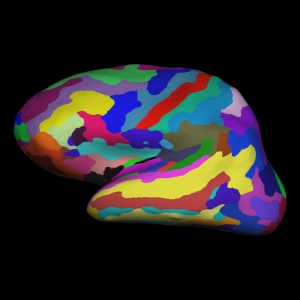

dict_keys(['labels', 'map_left', 'map_right', 'description'])


" Note: we chose 'infl_left' here to match the image above, but the same image could be plotted on pial surface or at different angles using this plot_surf_roi function"

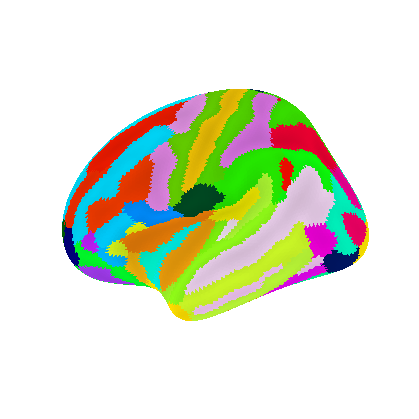

In [37]:
destrieux = datasets.fetch_atlas_surf_destrieux()

''' See outputs of the dataset '''
print(destrieux.keys())

atlas = destrieux['map_left']
fsaverage = datasets.fetch_surf_fsaverage()
plot = plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=atlas,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.2, ba  )
''' Note: we chose 'infl_left' here to match the image above, but the same image could be plotted on pial surface or at different angles using this plot_surf_roi function'''

## Functional parcellations
The goal of functional parcellations is to group voxels based on similar function, using either functional activity or functional connectivity as similarity measures. Again, a nice review can be found in [Moghimi *et al.* 2021](https://arxiv.org/pdf/2107.03475.pdf). The assumption is that functionally distinct brain regions have voxels with shared functional activity and connectivity. For a great discussion of how cortical regions have a 'connectional fingerprint' reflecting both observed cell-firing differences and functional imaging activity, see: [Passingham, Stephan & Kötter (2002)](https://www.nature.com/articles/nrn893). A combination of resting state fMRI and task-based fMRI have been used to generate these parcellations. Before discussing the implementation and generation of functional parcellations, we wish to acknowledge a couple of ongoing fields of research: 

Although there is more to determine, it may be that functional activity (as compared to connectivity) would result in parcellations that have higher inter-subject consistency considering that it has been shown that subjects have idiosyncratic connectivity patterns ([Finn *et al.* 2015](https://www.nature.com/articles/nn.4135)). Craddock *et al.* (2012) conducted a detailed analysis using anatomical atlases (included the Talairach, Harvard-Oxford, and AAL detailed above) to evaluate how well they can reproduce functional connectivity patterns. They identified that the use of many regions in an anatomical atlas (600 or more) more accurately reflects functional connectivity patterns, while using atlases with fewer regions is substandard and less suited if the goal is to understand functional connectivity. For reference, see [here](https://onlinelibrary.wiley.com/doi/10.1002/hbm.21333). 

Likewise, recent work has explored whether functional parcellations derived from resting-state versus from task-evoked fMRI might differ. Specifically, it has been shown (unsurprisingly) that the functional organization of the brain depends on the task such that a parcellation generated from one task will differ from a parcellation generated from another task ([Salehi *et al.* 2019](https://pubmed.ncbi.nlm.nih.gov/31740342/)). 

Signal-to-noise ratio (SNR) varies across the brain, suggesting that the reliability of parcellation results will vary across the brain, as well (Yeo *et al.* 2011; reviewed in Moghimi *et al.* 2021). In light of SNR variability, Yeo *et al.* 2011 proposes that similarity in functional connectivity profiles is superior to functional activity on its own. 

Individual versus group-level parcellations. Individual-level parcellations apply parcellations to an individual's dataset (typically multi-sessions scans) [Ex: Braga & Buckner, 2017](https://pubmed.ncbi.nlm.nih.gov/28728026/). Group-level parcellations combine datasets across people. Group-level parcellations capture the common "average brain" and absolve the [concordance problem](https://pubmed.ncbi.nlm.nih.gov/19787067/). At the same time individual-level parcellations capture idiosyncrasies unique to individual brains and have higher SNR, making it possible to capture inter-individual variability in networks/locations on a smaller, more localized scale (Braga & Buckner, 2017), to predict certain features about the individual (ex: sex - [Salehi *et al.*2018](https://www.sciencedirect.com/science/article/pii/S1053811917307139)) and to link individual differences in neural activity to behavior (Finn *et al.,* 2015). Notably, **the choice between using a individual-level parcellation or a group-level parcellation depends on the data available and the level of analysis one is interested in.** The construction of a group-level parcellation requires registering the scan of each individual subject into a common space template to look at the one-to-one correspondence between voxels across subjects. 

There are two algorithms (among others) used to generate functional parcelltions: (1) cluster-based, (2) graph-based. 
    - Cluster-based algorithms divide voxels into groups that have higher within-group similarity as compared to across-group similarity. Common clustering algorithms include K-means or hierarchical clustering. 
    - Graph-based algorithms treat voxels as "nodes" (vertices) and treat the similarity between voxels as "edges" (links). Once these graphs are generated, edges are binarized such that if the strength (similarity) is above a certain pre-determined threshold then it is given a 1, and otherwise a 0. 

Below, we introduce a series of widely used functional parcellations and note which features were used to generate them. 

1. [Yeo parcellation](https://https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3174820/)

- This parcellation divides the cortex based on resting state networks (either 7 or 17) using data from 1000, healthy subjects. 
- It employs a clustering approach
- Notably, it shows not only localized networks (ex: motor), but also distributed networks that operate across the cortex (ex: Default Mode). 
- This network is also available in the [Freesurfer package](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation_Yeo2011)
- This is available in MNI152 space through Nilearn and in Freesurfer space through Neuroparc. We include the [Nilearn function](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_yeo_2011.html) below and show how both the 17 and 7 Network labels can be included. 


dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])


"Note: if you want to keep the canonical Yeo colors for your plotting, there is a 'colors_7' txt file available in the nilearn function"

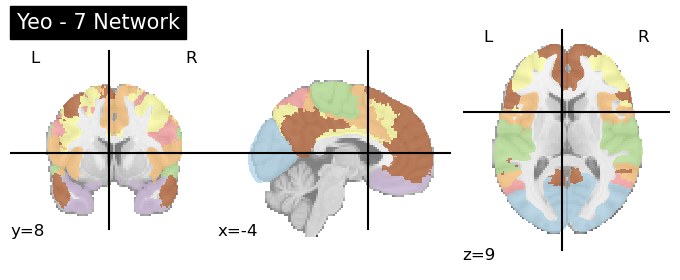

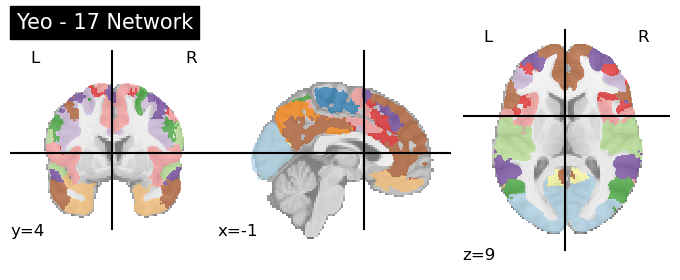

In [30]:
yeo = datasets.fetch_atlas_yeo_2011()

''' See outputs of the dataset '''
print(yeo.keys())

for label in ['thick_7','thick_17']:
  n = label.replace("thick_","")
  atlas = yeo[label] #this loads in a .nii file
  plotting.plot_roi(atlas, title=f'Yeo - {n} Network',cmap='Paired')

'''Note: if you want to keep the canonical Yeo colors for your plotting, there is a 'colors_7' txt file available in the nilearn function'''

The image above plots the network colors so that networks in different hemisphere have the same colors. If you want to split up the networks into 49 ROIs, nilearn includes a useful `connected_labels_regions` function. Further information using the Yeo network in nilearn is detailed [here](https://nilearn.github.io/auto_examples/06_manipulating_images/plot_extract_regions_labels_image.html).

/Users/lukechang/opt/anaconda3/lib/python3.9/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


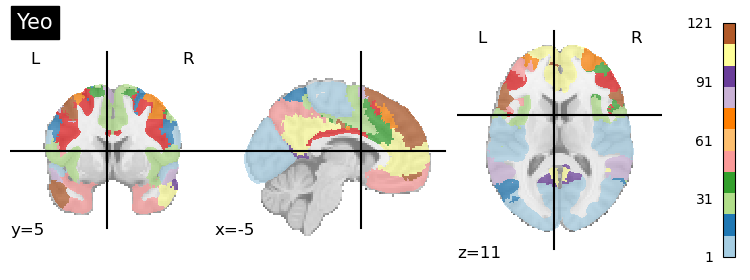

In [31]:
from nilearn.regions import connected_label_regions

region_labels = connected_label_regions(atlas)

plotting.plot_roi(region_labels, title='Yeo',
                  colorbar=True, cmap='Paired')

2. [Schaefer parcellation](https://pubmed.ncbi.nlm.nih.gov/28981612/)

- This parcellation aims to combine (1) local gradient and (2) global similarity approaches by using both **task-based fMRI and resting-state fMRI**. They develop a gradient-weighted Markov Random Field (gwMRF) model. 
- Local gradient approaches look at brusque changes in the functional connectivity patterns, while global similarity approaches cluster based on similar functional connectivity more broadly (such as Yeo). 
- Importantly, the [Github page](https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal) for this parcellation is consistently updated and provides the parcellation in Freesurfer space, HCP space, and MNI space. 
- The parcellation also comes with labels from the Yeo 7 resting state network or 17 Network parcellation and can be split into 100, 200, 300, 400, 500, 600, 700, 800, 900, and 1000 parcels depending on user preference. A detailed anatomical description of the functional and structural features of these nodes is included in the publication. 
- It is available both through Nilearn and Neuroparc and we provide example code for how to use the [Nilearn function](https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal) below. In Nilearn, the reference space is MNI152.
- In this case, the number of ROIs (parcels), the network number (7 or 17) and the resolution (1 or 2 mm) needs to be specified. 

dict_keys(['maps', 'labels', 'description'])


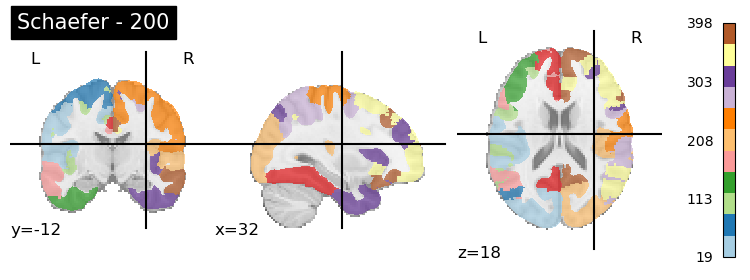

In [33]:
schaefer = datasets.fetch_atlas_schaefer_2018()

''' See outputs of the dataset '''
print(schaefer.keys())

''' Change here if you want a different number of rois, networks, or resolution'''
n_rois=200
yeo_networks=7
resolution_mm=1

dataset_s= datasets.fetch_atlas_schaefer_2018(n_rois,yeo_networks,resolution_mm)
atlas = schaefer['maps']

plotting.plot_roi(atlas, title=f'Schaefer - {n_rois}',
                  colorbar=True, cmap='Paired')


3. [Shen Parcellation](https://pubmed.ncbi.nlm.nih.gov/23747961/)
- The Shen parcellation is a groupwise **graph-theory-based** parcellation. It is also based on **resting state** functional connectivity
- The parcellation comes with 268 nodes (including subcortical nodes)
- Unfortunately, it is not found in nilearn or in Neuroparc, but we can find the parcellation on [Neurovault](https://neurovault.org/images/395091/). We use this link in the code snippet below. 
- We highly recommend that users of the Shen parcellation use this [BioImage Suite tool](https://bioimagesuiteweb.github.io/bisweb-manual/tools/conncontrol.html) that provides information about how to label each ROI and its network identity. 

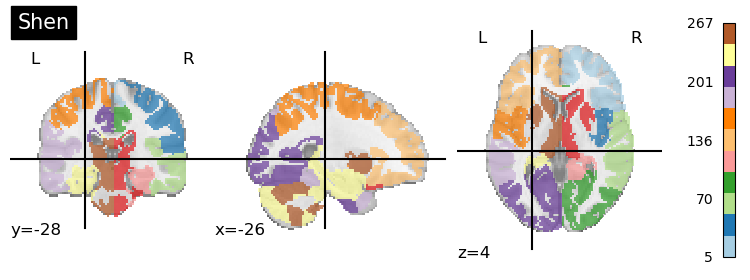

In [34]:

shen = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz').to_nifti()

plotting.plot_roi(shen, title='Shen', cmap='Paired', colorbar=True)


Something of note is that while we usually think of voxels as belonging to one single region (**hard assignment**), but it also possible that a voxel can belong to multiple regions (**soft assignment**). Consider parcellations based on network - (association cortex) regions may be "part of" different networks depending on task. Below, we introduce the idea of multimodal parcellations. 

# Structural parcellations

- Structural parcellations reflect the **structural connectivity profile** and rely on diffusion-weighted MR. The connectivity profile of a voxels reflects the probability of that voxel being connected to other voxels via a white matter fiber. They estimate where white matter tracks start and end and their pathways. The premise is that connections reflect functional organization, so cortical regions that are functionally distinct from one another should have different connectivity patterns. However, given that structural parcellations rely on accurate white matter fiber estimation, the limiting factor is the fidelity of the tractography process. There are two main topographic approaches for mapping fibers: (1) deterministic and (2) probabilistic, but the majority use **probabilistic tractography**. Similar methods of clustering (as described under Functional Parcellations) are used to assign boundaries based on connectivity. Importantly, tractography algorithms are biased towards tracts ended on the gyral surface such that parcellations are biased to align with the sulci.

- For an excellent discussion of how tractography connections compare to retrograde tracer injections in the macaque neocortex, we recommend this excellent publication by [Donahue and colleagues (2016)](https://www.jneurosci.org/content/36/25/6758). They show that tractography confirms the white matter pathways identified with the invasive tracing with high sensitivity, but also discuss limitations in specificity. 

- Below, we present the widely-available and used Glasser parcellation which is multimodal.

## Multimodal parcellations

1. [Glasser parcellation](https://www.nature.com/articles/nature18933)
- This parcellation splits up the cortical surface in 360 nodes (180 per hemisphere). 
    - A key feature of this parcellation is that they identified new brain areas (97) and 83 known-areas. 
- Data from 210 subjects 
- The Glasser parcellation is **multimodal** because as compared to using only (1) anatomy, (2) function, (3)connectivity and (4) topography, it combines complementary information from across these methods, increasing the confidence in the labeling of regions as distinct. The authors combined all four properties using Human Connectome Project MRI data, taking into consideration myelin content and cortical thickness for anatomy, task MRI across 7 tasks for function, and resting state MRI for functional connectivity. The combination of these approaches also led to the use of cortical folding, myelin and resting state fMRI to generate a parcellation with high intersubject cortical alignment. 
- Unsurprisingly, there can be discrepancies between imaging modalities (i.e. the same voxel can be assigned to different regions depending on whether structural or functional connectivity are used). Glasser *et al.* required that at least two converging modalities were used to assign voxels to regions. 
- We recommend this [Github page](https://github.com/brainspaces/glasser360) to access the parcellation
- Unfortunately, the parcellation is not found in Nilearn, but is in Neuroparc. We load in the parcellation below from Neuroparc. 
- It is notable that the parcellation can be found through the [Human Connectome Project (HCP) package](https://rmldj.github.io/hcp-utils/). The `hcp.mmp` refers to the Glasser (multi-modal parcellation). 


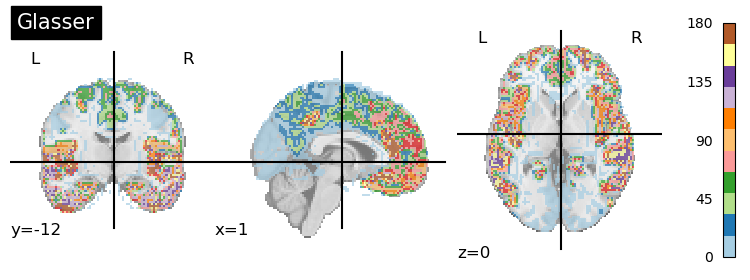

In [35]:
atlas_glasser = Brain_Data('https://github.com/neurodata/neuroparc/raw/master/atlases/label/Human/Glasser_space-MNI152NLin6_res-4x4x4.nii.gz').to_nifti()

plotting.plot_roi(atlas_glasser, title='Glasser',cmap='Paired', colorbar=True)


- Rosen & Halgren: https://pubmed.ncbi.nlm.nih.gov/33483325/

## Summary of differences between parcellations

Here, we summarize the information above and note a few additional tools which may be of interest. The choice of parcellation deeply relates to the scale of the researcher's question of interest (e.g., region vs. network). 
- Anatomical parcellations:
  - Defined based on anatomical landmark (sulci/gyri)
  - Intended to relate to macroscale cytoarchitectural properties
  - Reflects the spatial location of a region
  - Disregards idioisyncracies in brain anatomy and functional-anatomical differences across subjects
- Functional parcellations:
  - Defined with functional activity/connectivity measures
  - Uses resting-state and/or task-based fMRI
  - Groups regions based on similarity of function based on clustering or graph metrics
  - Can be well-defined at the individual-subject and group level
  - Varying degrees of granularity (anywhere from 100 to 1000 regions)
- Multimodal parcellations:
  - Combines anatomical, functional, and topographic methods to define parcels
  - Defined at the group-level


### Other forms of parcellations not mentioned here

Other parcellations exist as well:
- Transcriptomics - divide the cortex based on gene-expression
- Local cytoarchitectures (e.g., agranular, granular, etc)
- Structural properties (e.g., pial thickness)

For these atlases, we recommend [the ENIGMA Toolbox](https://enigma-toolbox.readthedocs.io/en/latest/index.html) - an opensource meta-analysis package including genetic, disease, and structural metrics. For more information, check out ([Lariviere et al., 2022](https://www.nature.com/articles/s41592-021-01186-4)).

Also, there are parcellations derived from meta-analyses of task data such as Neurosynth. A few of these atlases are available on [Neurovault](https://neurovault.org/collections/2099/)